In [1]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#masukkan dataset
df_train = pd.read_csv('DMC_2017_task/dataset.csv')
df_train

NameError: name 'pd' is not defined

In [3]:
#melihat deskripis variabel saleprice
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

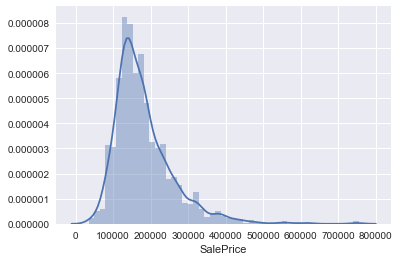

In [4]:
#histogram
sns.distplot(df_train['SalePrice']);

dari datadiatas dapat dilihat bahwa nilai variable saleprice tidak menyebar normal atau berada pada sekewed sebelah kiri

In [5]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [6]:
df_train


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


# melihat hubungan liner dengan variabel numerik 


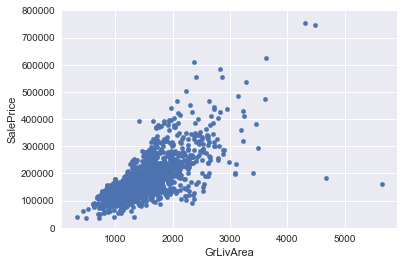

In [7]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

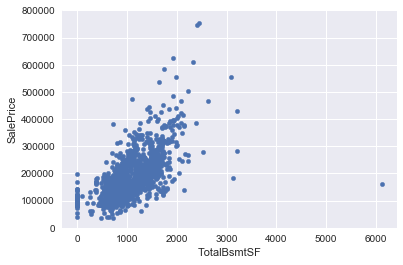

In [8]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

# melihat hubungan linier varibel kategorik terhadap SalePrice

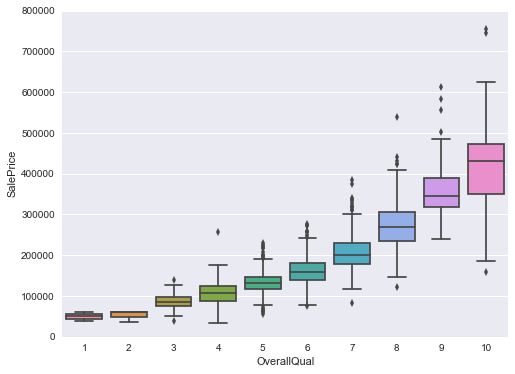

In [9]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

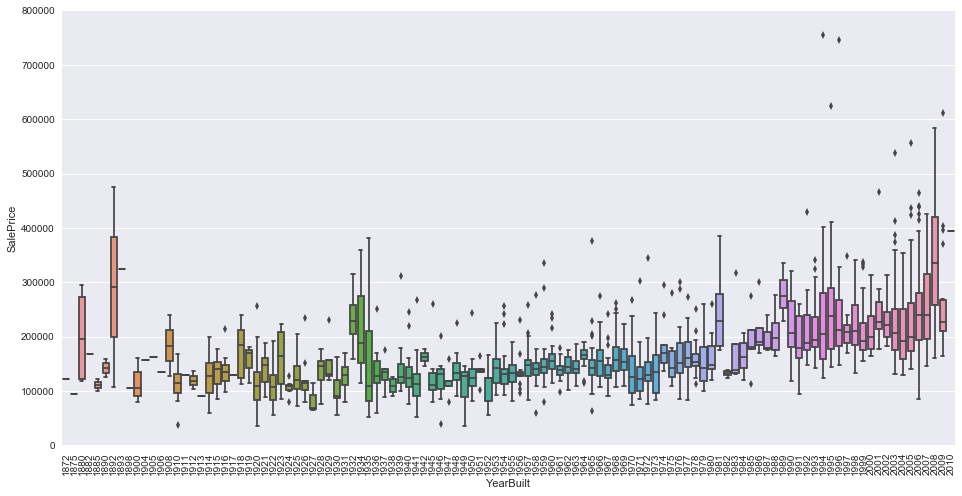

In [10]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

di dugaan awal kita dapat melihat hubungan antara GrLivArea dan TotalBsmtSF mempunyai pendekatan linier yang bernilai postif begitu juga dengan variable OverallQual di perlihatkan bahwa kenaikan varibel ini mempengaruhi saleprice

# variabel yang tidak memilki hubungan liner dengan SalePrice

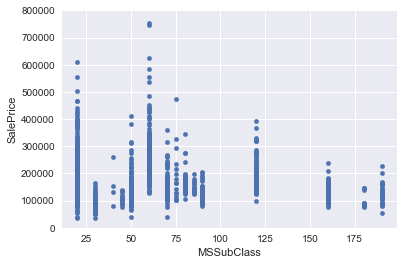

In [11]:
#scatter plot totalbsmtsf/saleprice sebagai counter example
var = 'MSSubClass'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

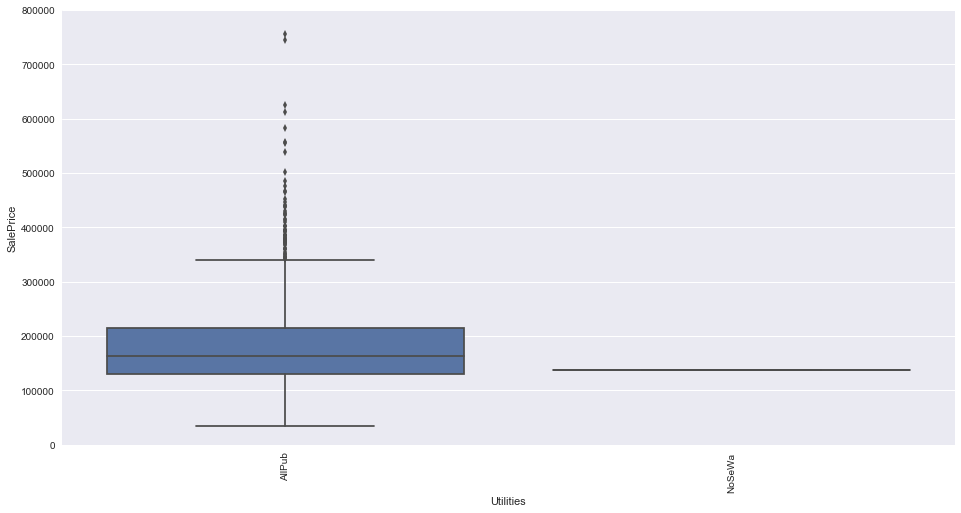

In [12]:
var = 'Utilities'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

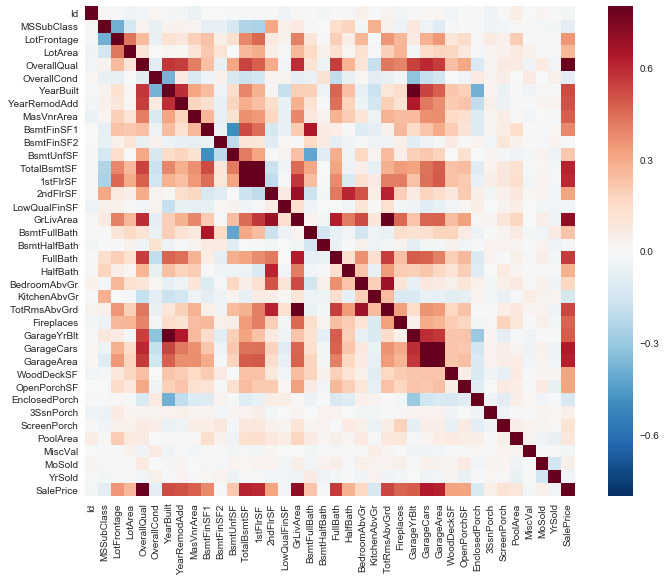

In [13]:
#matriks korelasi 
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

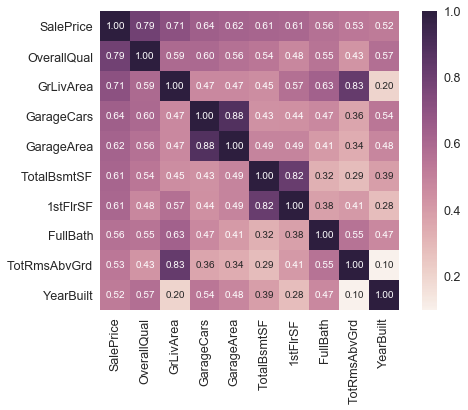

In [14]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### menurut data 10 variable paling besar mempunyai corelati dengan saleprice ada
1. overallqual gtlivarea mempunyai korelasi yang besar sekali perlu kita perhatikan lebih lanjut
2. untuk GarageCars dan GarageArea pada dasarnya adalah dua hal yang sama misalnya kalo salah satunya membesar otomatis yang satunya juga 
dan untuk variabel variabel selanjutnya dan perlu kita perhatikan untuk varibel yearbuilt karena kombinasi nya diawal sangat besar perlu diperhatikan lagi varibel ini digunakan atau tidak

# handling missing data

In [15]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(19)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [16]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)


In [17]:
df_train.isnull().sum().max()

0

# praproses data terhadap variable SalePrice dan variable yang mempunyai hubungan linier 

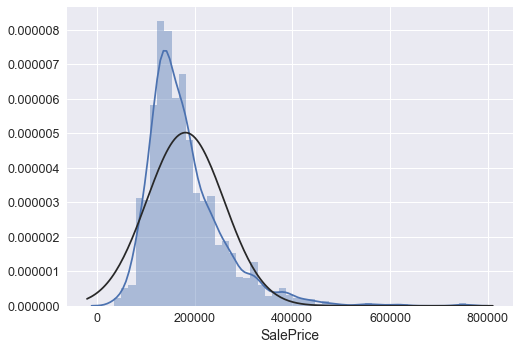

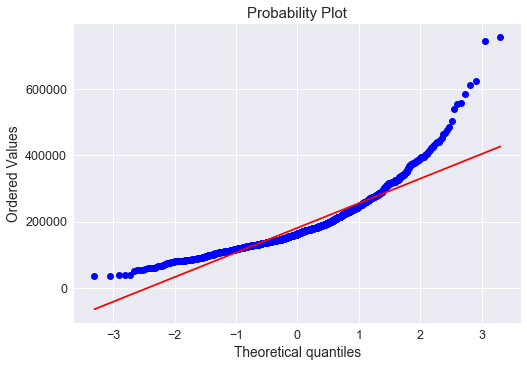

In [18]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [19]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

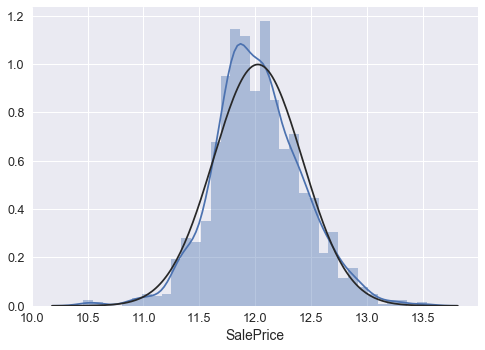

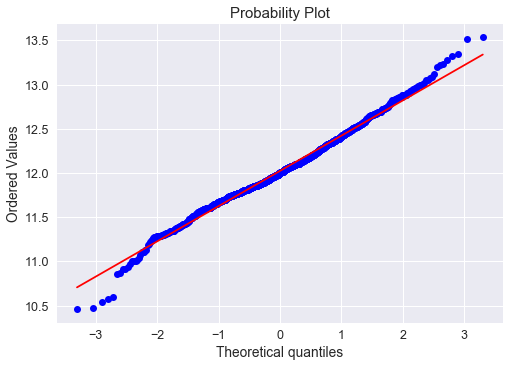

In [20]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [21]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

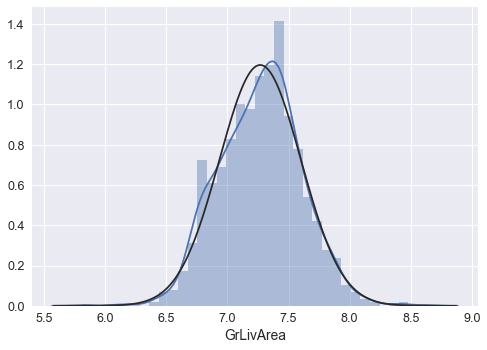

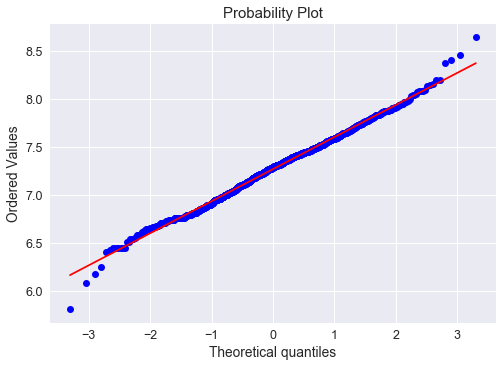

In [22]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [23]:
#convert categorical variable into dummy
df_trainf = pd.get_dummies(df_train)
df_trainf

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
5,6,50,14115,5,5,1993,1995,732,0,64,...,0,0,0,1,0,0,0,0,1,0
6,7,20,10084,8,5,2004,2005,1369,0,317,...,0,0,0,1,0,0,0,0,1,0
7,8,60,10382,7,6,1973,1973,859,32,216,...,0,0,0,1,0,0,0,0,1,0
8,9,50,6120,7,5,1931,1950,0,0,952,...,0,0,0,1,1,0,0,0,0,0
9,10,190,7420,5,6,1939,1950,851,0,140,...,0,0,0,1,0,0,0,0,1,0


Membuat liner model

In [24]:
Y = df_trainf["SalePrice"]
X = df_trainf.drop("SalePrice", 1)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
  X,
  Y,
  test_size=0.4,
  random_state = 42 )

In [26]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RANSACRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


classifiers = [
    LinearRegression()
    
    ]

for clf in classifiers:
    clf.fit(X_train, Y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    rmse = np.sqrt( metrics.mean_squared_error( Y_test, train_predictions ) )
    print("RMSE: {}".format(rmse))
    print('Koefisien: \n', clf.coef_)
    print('Intercept: \n', clf.intercept_)
   
    
print("="*30)

LinearRegression
****Results****
RMSE: 0.13139429919604764
Koefisien: 
 [ -1.82337647e-05  -2.89997748e-04   1.87067328e-06   3.67812167e-02
   4.45184227e-02   1.63464733e-03   7.59277048e-04   8.44299258e-05
   4.12112318e-05  -2.09328515e-05   1.04708203e-04  -1.24041966e-04
  -1.62561152e-05  -6.75410925e-05   5.14170931e-01   1.15385165e-02
  -1.11889451e-02   1.98375210e-02   8.78099984e-03  -1.17727873e-02
  -7.20523838e-02   1.19565502e-02   2.31409917e-02   1.23412906e-02
   1.88575839e-04   7.56062588e-05   8.03895560e-05   1.55601334e-04
   1.24869262e-04   2.53828031e-04   6.38366843e-05  -1.83061777e-05
  -1.66185045e-03  -4.72235157e-03  -2.83431574e-01   9.31003205e-02
   7.24982746e-02   7.43297742e-02   4.35032044e-02  -8.40330540e-02
   8.40330540e-02  -1.52783732e-02   3.16489342e-02   3.96496417e-04
  -1.67670575e-02  -2.37445753e-02   2.01000351e-02  -7.50283778e-03
   1.11473779e-02   7.15802787e-02  -7.15802787e-02   1.17005857e-02
   7.62609189e-03  -3.67211676e

In [27]:
model = LinearRegression()
model.fit(X_train, Y_train)
model.coef_
Y_pred = model.predict(X_test)


In [28]:
Y_test.describe()

count    584.000000
mean      12.032425
std        0.424413
min       10.471950
25%       11.775290
50%       12.012791
75%       12.278626
max       13.534473
Name: SalePrice, dtype: float64

klasifikasi hasil akhir untuk 
1. 10.460242-11.00000 (murah)
2. 11.00001 - 12.001505 (sedang)
3. 12.001505 - 13.534473 (mahal)

In [29]:
murah = Y_test[Y_test<11].sort_values(ascending=True) 


In [30]:
mahal = Y_test[Y_test>12.001505 ].sort_values(ascending=True)



In [31]:
sedang = Y_test[Y_test<12.001505 ].sort_values(ascending=True)




In [32]:
sedang.drop(sedang.head(5).index, inplace="True")


In [33]:
import math
listmurah = list(murah)
listsedang = list(sedang)
listmahal = list(mahal)

In [34]:
listmurahAsli=[]
for i in listmurah:
    listmurahAsli.append(math.exp(i))

In [35]:
listsedangAsli=[]
for i in listsedang:
    listsedangAsli.append(math.exp(i))

In [36]:
listmahalAsli=[]
for i in listmahal:
    listmahalAsli.append(math.exp(i))

In [37]:
framemurah=pd.DataFrame(listmurahAsli)
framesedang=pd.DataFrame(listsedangAsli)
framemahal=pd.DataFrame(listmahalAsli)
murahsedang = framemurah.append(framesedang)
frameAll = murahsedang.append(framemahal)


In [38]:
frameAll.head(4)

,0
0,35311.0
1,37900.0
2,40000.0
3,52000.0


In [39]:
listprediksiHasil=[]
listprediksiHasil= Y_pred
type(Y_pred)
listhasilprediksi=list(Y_pred)
listhasilprediksi

[11.265305354942161,
 11.994870201379705,
 11.4946849076098,
 12.037960037203856,
 11.142232072632044,
 11.282361513150205,
 12.436693780453945,
 12.218341778834963,
 12.601960354200633,
 11.944754043147938,
 11.895010986340134,
 12.21600093522963,
 12.085634101732497,
 12.289568338825715,
 12.370809172024634,
 12.06852449289102,
 12.185346195163488,
 11.634404706557822,
 11.856329724025858,
 12.303998624754094,
 12.013474375986515,
 12.23743295661944,
 11.743285273228311,
 12.229980570585367,
 12.212052998963664,
 11.918436025523091,
 12.130789991732433,
 11.615130798741568,
 12.100558287759766,
 11.874837196891887,
 11.519822796980268,
 12.604806251038937,
 12.133625586880292,
 11.683625844542284,
 11.684858863094604,
 12.148935843481718,
 11.79870369759414,
 12.237679351202772,
 11.883797087376774,
 11.479301200613612,
 11.788706790832293,
 12.339121219549012,
 10.938358041483207,
 12.841777848754951,
 12.671041254752353,
 11.855817042143368,
 11.345205188159413,
 11.857398944903069

In [40]:
listhasilprediksiAsli=[]
for i in listhasilprediksi:
    listhasilprediksiAsli.append(math.exp(i))

In [41]:
listhasilprediksiAsli.sort()
listhasilprediksiAsli

[34213.36696177145,
 40163.76848117199,
 51162.67215575388,
 56294.83343718864,
 57372.16432521718,
 58895.91262472727,
 60600.12619193909,
 62170.32446955427,
 62669.83620794796,
 66081.0690339383,
 66919.9194302467,
 67856.65577502041,
 68391.03780677402,
 69025.55467564902,
 69626.18751683076,
 70161.50354998237,
 71401.76122754141,
 72309.45804983532,
 74007.83198826808,
 77973.1918117565,
 78065.64505114796,
 78900.18536559994,
 79408.56501557755,
 80711.85980713058,
 81687.8509023503,
 82782.0074804389,
 84137.36231325798,
 84559.03328307522,
 85624.24442729176,
 86495.68111761502,
 87154.00671560278,
 87334.20058342445,
 87412.15215587607,
 89520.04794747506,
 89687.21564457181,
 89902.73139285634,
 90430.17592157792,
 90461.58027787863,
 90466.99030054385,
 91068.14439580482,
 93315.20797831213,
 93700.38502343318,
 94178.2629769219,
 95436.49207963984,
 95650.72019364008,
 96313.35610885291,
 96477.17400680394,
 96693.47482411894,
 96834.02258206265,
 97524.74536816294,
 97780

In [42]:
#frameAll["prediksi"] = listhasilprediksiAsli
#frameAll


# melihat RMSE data harga rumah sebenarnya

In [43]:
baru=pd.DataFrame(listhasilprediksiAsli)
baru

,0
0,34213.366962
1,40163.768481
2,51162.672156
3,56294.833437
4,57372.164325
5,58895.912625
6,60600.126192
7,62170.324470
8,62669.836208
9,66081.069034


In [44]:
baru1=[]
baru4=[]
baru1 = frameAll
baru4 = listhasilprediksiAsli

In [45]:
rmse1 = np.sqrt( metrics.mean_squared_error( baru1, baru4 ) )
print("RMSEHargaAsli: {}".format(rmse1))

RMSEHargaAsli: 12775.982013300802


In [46]:
frameAll["prediksi"] = listhasilprediksiAsli
frameAll


,0,prediksi
0,35311.0,34213.366962
1,37900.0,40163.768481
2,40000.0,51162.672156
3,52000.0,56294.833437
4,55993.0,57372.164325
0,60000.0,58895.912625
1,60000.0,60600.126192
2,60000.0,62170.324470
3,62383.0,62669.836208
4,64500.0,66081.069034
